In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import rioxarray as rxr

In [2]:
im = Image.open('tuv_rastpop2020rps_100m.tif')

In [9]:
%matplotlib inline
im.show()


In [3]:
pop_array = np.array(im)

In [7]:
pop_array = np.where(pop_array<0,np.nan,pop_array)

In [8]:
pop_array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [9]:
pop_array.shape

(5353, 4906)

CRS	EPSG:4326 - WGS 84 - Geographic
Extent	175.7969058464646253,-10.9080489413632087 : 180.7029058464646312,-5.5550489413632089
Unit	degrees
Width	4906
Height	5353
Data type	Float32 - Thirty two bit floating point
GDAL Driver Description	GTiff
GDAL Driver Metadata	GeoTIFF
Compression	LZW
Band 1	
STATISTICS_MAXIMUM=310
STATISTICS_MEAN=32.502717391304
STATISTICS_MINIMUM=1
STATISTICS_STDDEV=44.974955103937
More information	
AREA_OR_POINT=Area
Dimensions	X: 4906 Y: 5353 Bands: 1
Origin	175.797,-5.55505
Pixel Size	0.001000000000000001105,-0.001000000000000000021

In [15]:
xr_pop = rxr.open_rasterio('tuv_rastpop2020rps_100m.tif',masked=True)

In [23]:
list(xr_pop.x)

<xarray.DataArray 'x' ()>
array(175.79740585)
Coordinates:
    x            float64 175.8
    spatial_ref  int32 0

In [44]:
xr_nanumea = np.squeeze(np.array(xr_pop.sel(x=slice(176.040783,176.153828),y=slice(-5.623541,-5.712932))))

In [54]:
x = np.array(xr_pop.sel(x=slice(176.040783,176.153828),y=slice(-5.623541,-5.712932)).x)
y = np.array(xr_pop.sel(x=slice(176.040783,176.153828),y=slice(-5.623541,-5.712932)).y)

In [63]:
len(list(x))

113

In [64]:
len(list(y))

90

In [69]:
xr_nanumea.T.shape

(113, 90)

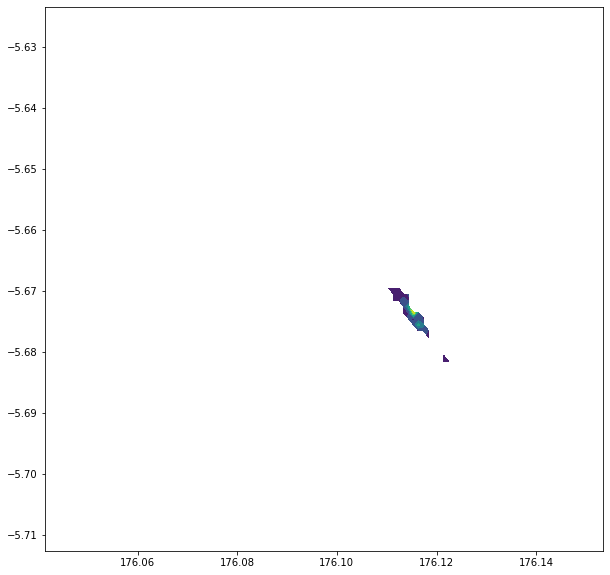

In [82]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.contourf(list(x),list(y),xr_nanumea)

ax1.set_xlim(np.min(list(x)),np.max(list(x)))
ax1.set_ylim(np.min(list(y)),np.max(list(y)))

plt.show()


In [43]:
np.squeeze(np.array(xr_nanumea))

(90, 113)

TypeError: Input z must be 2D, not 3D

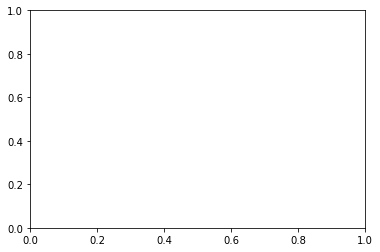

In [38]:
plt.contour(np.array(xr_nanumea))


In [31]:
xr_pop

<xarray.DataArray (band: 1, y: 5353, x: 4906)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 175.8 175.8 175.8 175.8 ... 180.7 180.7 180.7 180.7
  * y            (y) float64 -5.556 -5.557 -5.558 ... -10.91 -10.91 -10.91
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  310
    STATISTICS_MEAN:     32.502717391304
    STATISTICS_MINIMUM:  1
    STATISTICS_STDDEV:   44.974955103937
    scale_factor:        1.0
    add_offset:          0.0

In [100]:
mylist = [1,4,-2,-5,3,-8,1,2,5,-3,4,-2,3]

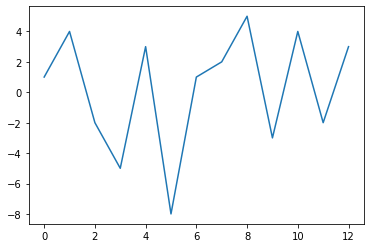

In [101]:
plt.plot(range(len(mylist)),mylist)

In [102]:
mysum = pd.Series(mylist).cumsum()

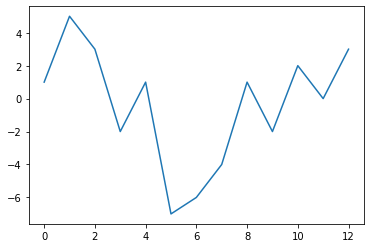

In [103]:
plt.plot(range(len(mysum)),mysum)

In [108]:
mysum

0     1
1     5
2     3
3    -2
4     1
5    -7
6    -6
7    -4
8     1
9    -2
10    2
11    0
12    3
dtype: int64

In [104]:
np.mean(mylist)

0.23076923076923078

In [106]:
np.mean(mylist)+np.std(mylist)*2

7.8021260303780195

In [107]:
np.mean(mylist)-np.std(mylist)*2

-7.340587568839558